In [1]:
from dataset import DataSet
import matplotlib.pyplot as plt

In [2]:
dataset = DataSet(repo='italia/covid19-opendata-vaccini', 
                  path='dati/somministrazioni-vaccini-summary-latest.csv',
                  date_cols=['data_somministrazione'],
                  index_cols=['data_somministrazione'])
dataset

DataSet
  repo: italia/covid19-opendata-vaccini
  path: dati/somministrazioni-vaccini-summary-latest.csv
  commit_url: https://api.github.com/repos/italia/covid19-opendata-vaccini/commits?path=dati/somministrazioni-vaccini-summary-latest.csv&page=1&per_page=1
  last_modified: 2021-02-08 09:04:20+01:00
  data_url: https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv
  df: 837 items

In [3]:
dataset.df.sort_index().tail()

,area,totale,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
data_somministrazione,,,,,,,,,,,,,,
2021-02-07,SAR,1115,394,721,854,261,0,0,226,889,ITG,ITG2,20,Sardegna
2021-02-07,UMB,54,17,37,46,8,0,0,1,53,ITI,ITI2,10,Umbria
2021-02-07,LAZ,4598,1823,2775,3102,491,193,812,380,4218,ITI,ITI4,12,Lazio
2021-02-07,CAL,858,427,431,565,212,81,0,146,712,ITF,ITF6,18,Calabria
2021-02-07,BAS,321,140,181,243,63,15,0,46,275,ITF,ITF5,17,Basilicata


In [9]:
class RegionalVaccinations:
    
    def __init__(self, dataset, region):
        self.region = region
        self.df = dataset.df[dataset.df['nome_area'] == region].sort_index()
        
    def show_doses(self, cumsum=False, figsize=(16, 10)):
        fig, ax = plt.subplots(figsize=figsize)
        df = self.df[['prima_dose', 'seconda_dose']]
        df.index.name = 'data somministrazione'
#         df = df[:-1] # today's data is not accurate
        colors = ['tab:blue', 'tab:orange']
        if cumsum:
            df = df.cumsum()
            df['prima_dose'] -= df['seconda_dose']
            df = df[df.columns[::-1]]
            colors = colors[::-1]
        df.plot(kind='area', ax=ax, color=colors)
        handles, labels = ax.get_legend_handles_labels()
        if cumsum:
            handles, labels = handles[::-1], labels[::-1]
        ax.set_title(f'Vaccinazioni {"totali" if cumsum else "giornalieri"} in {self.region}')
        ax.legend(handles=handles, labels=labels)
        plt.show()
        return df.iloc[-1]
        
    def show_sum(self, figsize=(16, 10)):
        fig, ax = plt.subplots(figsize=figsize)
        df = self.df[['prima_dose', 'seconda_dose']]

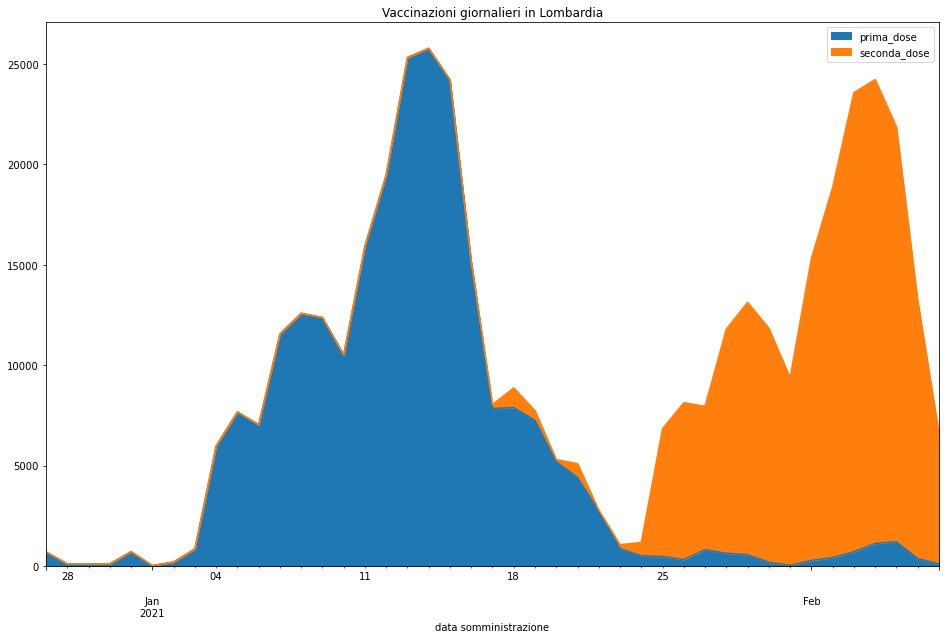

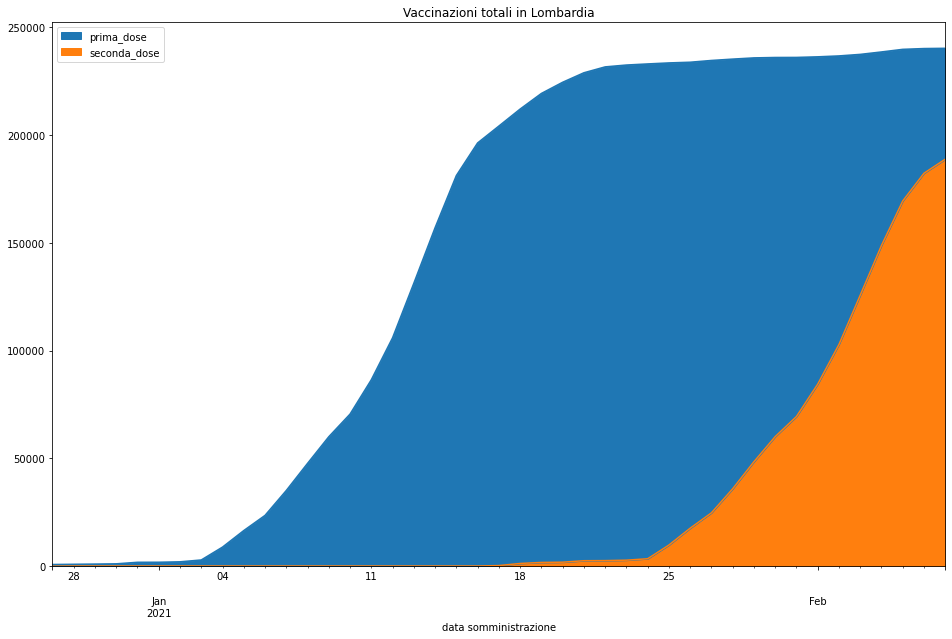

prima dose: 51480, totale: 240279


In [10]:
lombardia = RegionalVaccinations(dataset, 'Lombardia')
lombardia.show_doses()
d = lombardia.show_doses(cumsum=True)
print(f'prima dose: {d.prima_dose}, totale: {d.prima_dose + d.seconda_dose}')

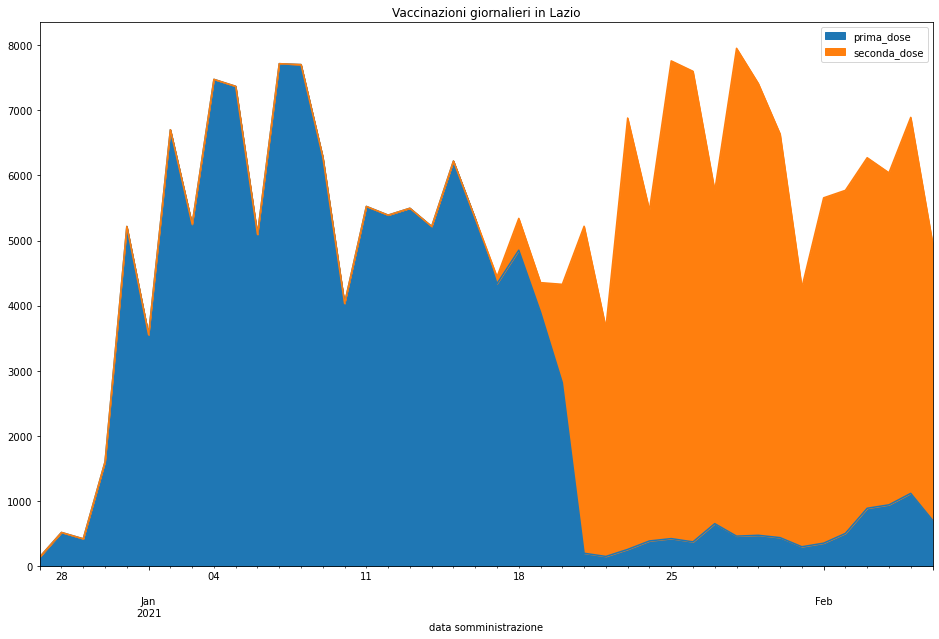

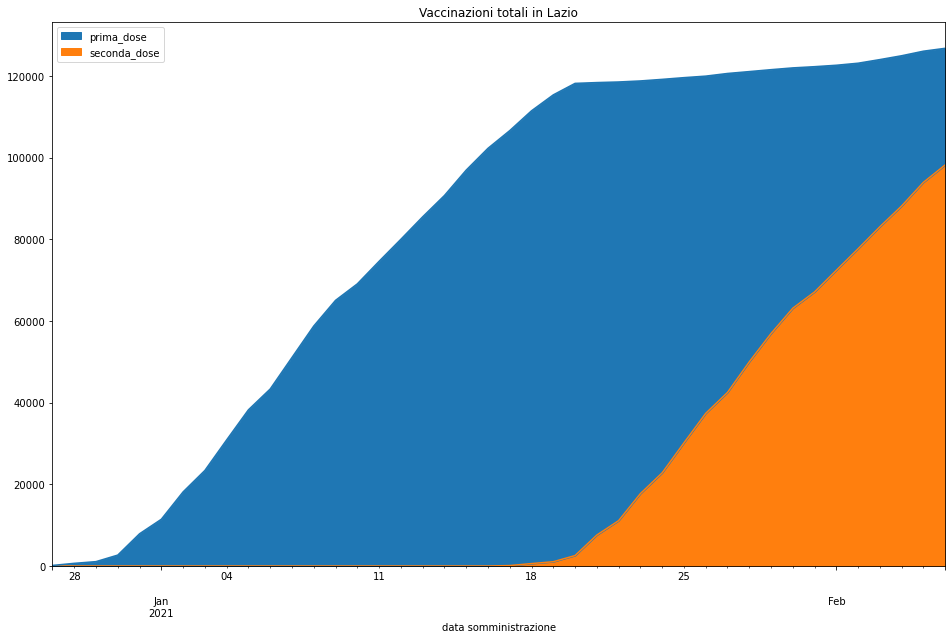

seconda_dose    98220
prima_dose      28547
Name: 2021-02-06 00:00:00, dtype: int64

In [6]:
lazio = RegionalVaccinations(dataset, 'Lazio')
lazio.show_doses()
lazio.show_doses(cumsum=True)

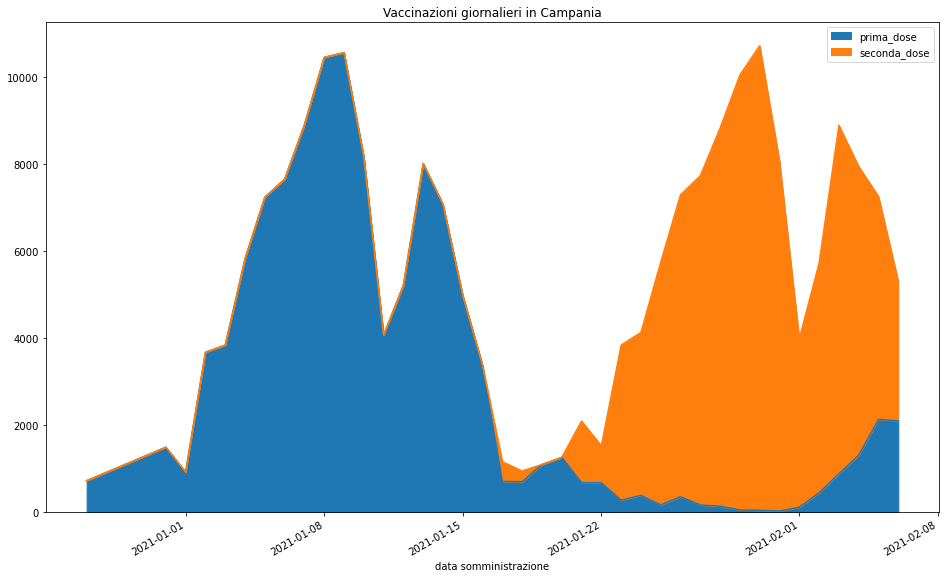

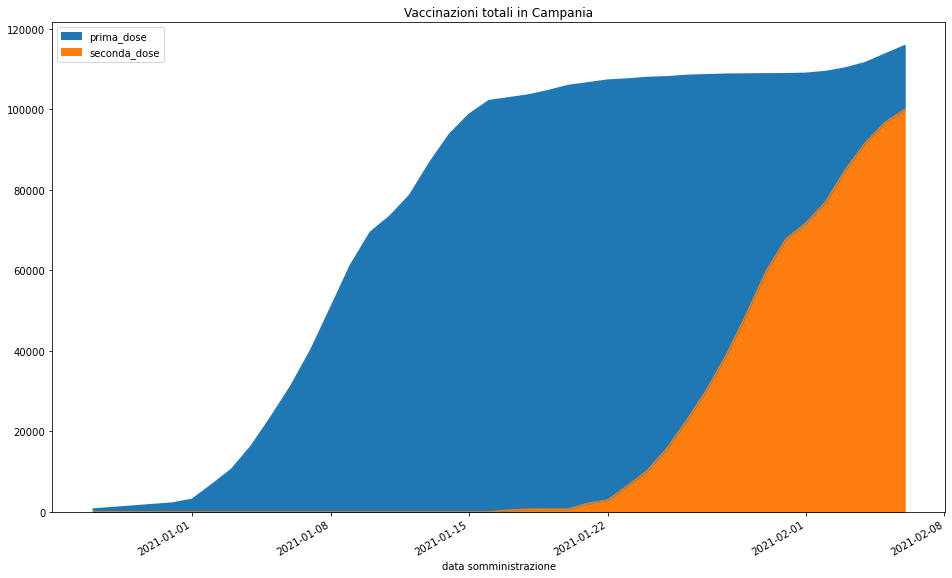

seconda_dose    99923
prima_dose      15867
Name: 2021-02-06 00:00:00, dtype: int64

In [7]:
campania = RegionalVaccinations(dataset, 'Campania')
campania.show_doses()
campania.show_doses(cumsum=True)

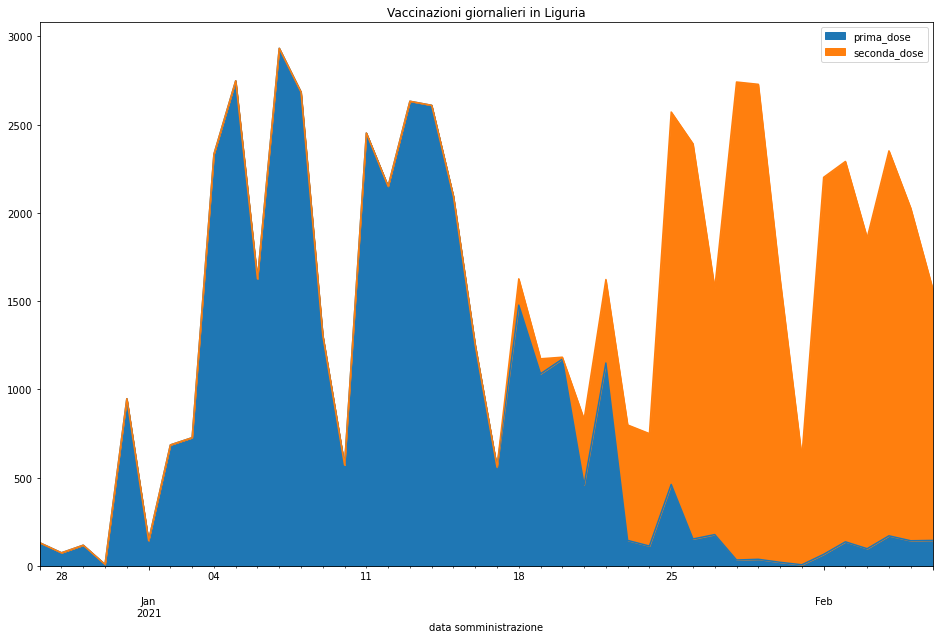

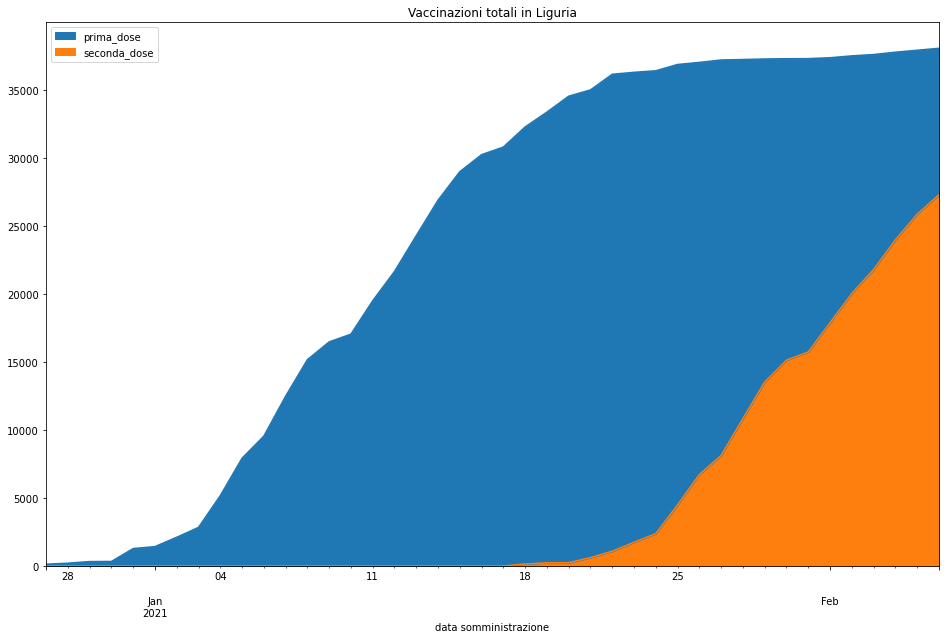

seconda_dose    27284
prima_dose      10772
Name: 2021-02-06 00:00:00, dtype: int64

In [8]:
campania = RegionalVaccinations(dataset, 'Liguria')
campania.show_doses()
campania.show_doses(cumsum=True)